In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA

In [2]:
data = pd.read_csv('./archive/Food_Production.csv',delimiter=',')
print(data.shape)
data.head(2)

(43, 23)


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# GET UNIQUE INDICATORS

In [3]:
indicators = data['Total_emissions'].unique().tolist()
print('total_emmision is from ' ,min(indicators),"to",max(indicators))

total_emmision is from  0.2 to 59.6


# DATA INFO

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [5]:
df_info= pd.DataFrame({"Dtype": data.dtypes, "Unique": data.nunique(), "Missing%": (data.isnull().sum()/data.shape[0])*100})
df_info

,Dtype,Unique,Missing%
Food product,object,43,0.000000
Land use change,float64,21,0.000000
Animal Feed,float64,10,0.000000
Farm,float64,24,0.000000
Processing,float64,10,0.000000
Transport,float64,8,0.000000
Packging,float64,10,0.000000
Retail,float64,4,0.000000
Total_emissions,float64,34,0.000000
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),float64,33,23.255814


# MATPLOTLIB VISUALIZATION WITH BAR

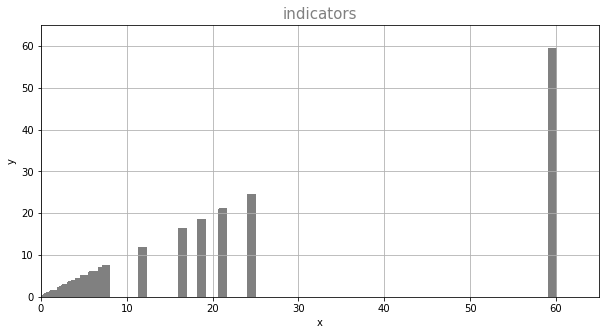

In [6]:
fig= plt.subplots(figsize = (10,5))
plt.bar(indicators,indicators,width=1,color='gray')
plt.xlabel('x')
plt.ylabel('y')
plt.title('indicators',fontsize=15,color='gray')
plt.axis([0,65,0,65])
#GRID = grille
plt.grid(True)
#show the plt
plt.show()

# HIST(1DIM)

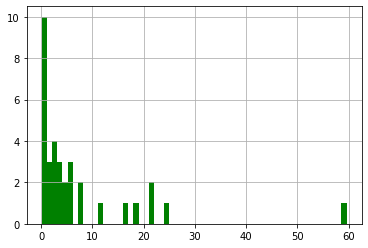

In [7]:
plt.hist(indicators,60,density=False,facecolor='green')
plt.grid(True)
plt.show()

# PLOT (2DIM)

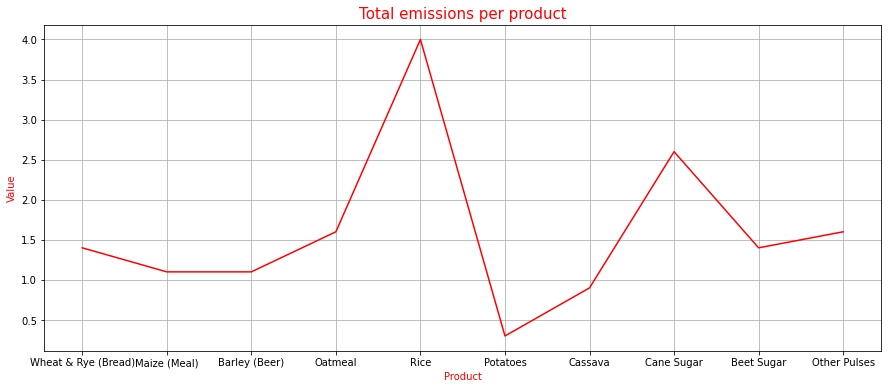

In [8]:
fig= plt.subplots(figsize = (15,6))
plt.plot(data['Food product'].iloc[0:10],data['Total_emissions'].iloc[0:10],color='red')
plt.xlabel('Product',fontsize=10,color='red')
plt.ylabel('Value',fontsize=10,color='red')
plt.title('Total emissions per product',fontsize=15,color='red')
plt.grid(True)

# SUBPLOTS

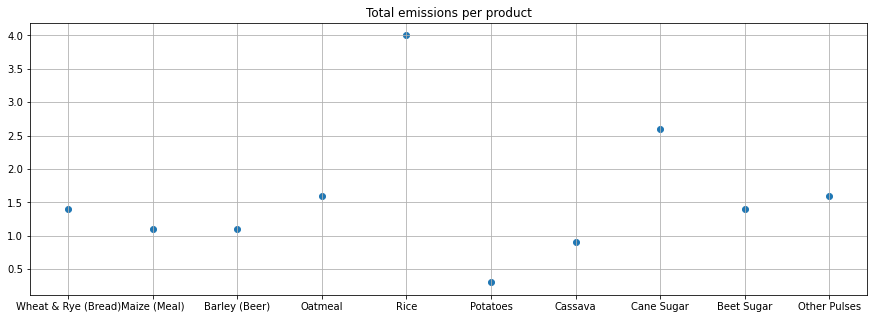

In [9]:
fig,axis = plt.subplots(figsize=(15,5))
axis.yaxis.grid(True)
axis.xaxis.grid(True)
axis.set_title('Total emissions per product')
axis.scatter(data['Food product'].iloc[0:10],data['Total_emissions'].iloc[0:10])
plt.show()

# Greenhouse gas emissions

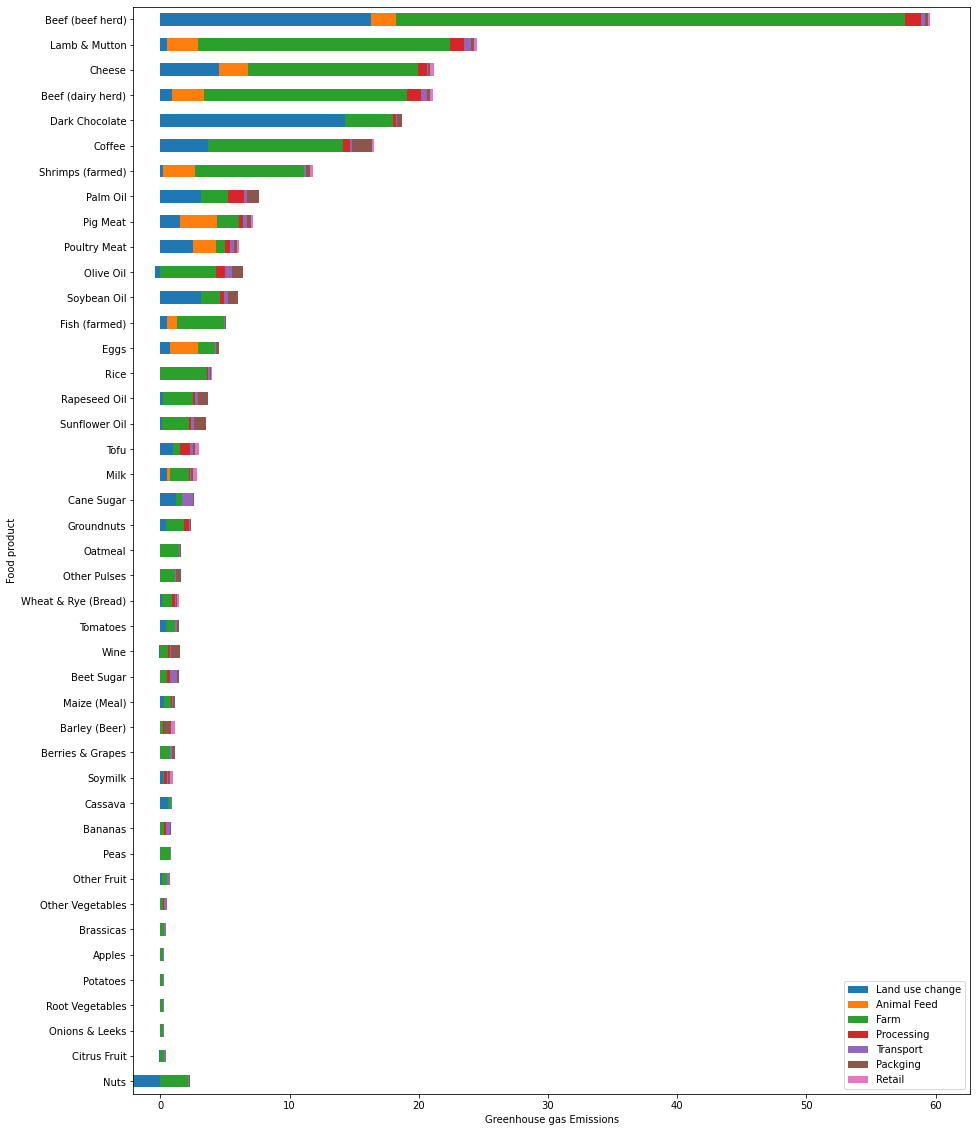

In [10]:
temp_df= data.sort_values(by= "Total_emissions", ascending= True).iloc[:,:8]
fig, ax = plt.subplots(figsize=(15,20))
temp_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax)
plt.xlabel("Greenhouse gas Emissions")
plt.show()

# SAVE THE FIGURE TO PNG

In [11]:
fig.savefig('Greenhouse gas Emissions.png')